In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.constants import micro

In [26]:
treatment = (2 ,'rplo 60 (Firmicutes)')
# outcome = 'myristate'
outcome = 'urate'

In [27]:
microbes_df = pd.read_csv("microbes.from_biom.tsv", sep='\t').drop(columns="9hr_late")
metabolites_df = pd.read_csv("metabolites.from_biom.tsv", sep='\t')

# Normalize (standard score)
microbe_names = microbes_df["#OTU ID"]
metabolite_names = metabolites_df["#OTU ID"]
microbes_df = microbes_df.drop(columns="#OTU ID")
metabolites_df = metabolites_df.drop(columns="#OTU ID")
microbes_mean = np.nanmean(microbes_df)             # mean of all microbe abundances
microbes_std = np.nanstd(microbes_df)               # std of all microbe abundances
metabolites_mean = np.nanmean(metabolites_df)       # mean of all metabolite abundances
metabolites_std = np.nanstd(metabolites_df)         # std of all metabolite abundances
microbes_normalized=(microbes_df-microbes_mean)/microbes_std
metabolites_normalized=(metabolites_df-metabolites_mean)/metabolites_std

microbes_df = microbes_normalized
metabolites_df = metabolites_normalized

microbes_df["#OTU ID"] = microbe_names
metabolites_df["#OTU ID"] = metabolite_names
# print(f"microbes shape: {microbes_df.shape}")
# print(f"metabolites shape: {metabolites_df.shape}")

In [28]:
microbes_df.head()

,3min_early,3min_earlymid,3min_latemid,3min_late,9hr_early,9hr_earlymid,9hr_latemid,18hr_early,18hr_earlymid,18hr_latemid,18hr_late,42hr_early,42hr_earlymid,42hr_latemid,42hr_late,49p5hr_early,49p5hr_earlymid,49p5hr_latemid,49p5hr_late,#OTU ID
0,19.229766,20.967189,9.367056,24.857506,9.579512,7.096130,9.957213,17.577325,4.570257,7.034754,4.381406,9.768363,6.463481,0.306960,3.385221,1.194556,2.969750,0.103946,0.004799,rplo 1 (Cyanobacteria)
1,-0.226543,-0.108511,-0.226543,-0.226543,17.865322,16.406453,22.638515,12.010961,-0.136839,32.194343,-0.226543,8.182020,11.269723,7.521043,0.491089,0.694103,1.199278,3.224698,0.911281,rplo 2 (Firmicutes)
2,-0.226543,-0.226543,-0.226543,-0.226543,-0.226543,-0.226543,-0.226543,-0.226543,0.864068,0.377779,0.594956,-0.226543,-0.004643,2.738408,0.014242,0.004799,2.459854,0.070897,-0.226543,rplo 60 (Firmicutes)
3,0.698824,0.349451,0.580793,1.364522,2.077432,1.402292,1.312588,1.931073,1.119016,1.331473,0.576071,2.171857,1.237048,0.873511,0.963215,1.487274,1.322030,0.944330,-0.122675,rplo 7 (Actinobacteria)
4,-0.226543,-0.226543,-0.226543,-0.226543,-0.226543,-0.226543,-0.226543,3.432433,-0.226543,2.917816,-0.226543,3.172764,-0.226543,3.885674,0.491089,1.383407,10.580419,-0.226543,-0.226543,rplo 10 (Firmicutes)


In [29]:
microbes_df["#OTU ID"]

0        rplo 1 (Cyanobacteria)
1           rplo 2 (Firmicutes)
2          rplo 60 (Firmicutes)
3       rplo 7 (Actinobacteria)
4          rplo 10 (Firmicutes)
                 ...           
461    rplo 95 (Proteobacteria)
462           rplo 96 (unknown)
463        rplo 97 (Firmicutes)
464    rplo 98 (Actinobacteria)
465     rplo 99 (Cyanobacteria)
Name: #OTU ID, Length: 466, dtype: object

In [30]:
metabolites_df.head()

,3min_early,9hr_early,18hr_early,42hr_early,49p5hr_early,3min_earlymid,9hr_earlymid,18hr_earlymid,42hr_earlymid,49p5hr_earlymid,3min_latemid,9hr_latemid,18hr_latemid,42hr_latemid,49p5hr_latemid,3min_late,18hr_late,42hr_late,49p5hr_late,#OTU ID
0,-0.277345,-0.277345,-0.277280,-0.277312,-0.277143,-0.277344,-0.276997,-0.277097,-0.277143,-0.276754,-0.277345,-0.276970,-0.275875,-0.274741,-0.276016,-0.277344,-0.275811,-0.275436,-0.274445,"(2,3-dihydroxy-3-methylbutanoate)"
1,-0.267520,-0.273044,-0.267394,-0.266448,-0.256714,-0.270695,-0.271140,-0.267579,-0.267990,-0.264535,-0.268405,-0.270781,-0.264456,-0.255665,-0.252845,-0.263082,-0.262351,-0.255079,-0.234685,"(2,5-diaminohexanoate)"
2,-0.267584,-0.257210,-0.248678,-0.258986,-0.215270,-0.266700,-0.253409,-0.216585,-0.192613,-0.229485,-0.263866,-0.249401,-0.246346,-0.235696,-0.167763,-0.261824,-0.254153,0.011843,-0.066860,(3-hydroxypyridine)
3,-0.266215,-0.148294,-0.165844,-0.242298,-0.262638,-0.262429,-0.085026,-0.068546,-0.195565,-0.148428,-0.240210,-0.013142,-0.151445,-0.187451,-0.217840,-0.226578,-0.119727,-0.160777,-0.244088,(3-methyladenine)
4,0.235030,0.232900,-0.164407,-0.251582,-0.261438,0.253571,0.737170,0.299038,-0.233349,-0.230435,0.646815,1.119717,-0.148715,-0.223470,-0.246592,0.905842,-0.029664,-0.210806,-0.244385,(4-oxoproline)


In [31]:
metabolites_df["#OTU ID"]

0     (2,3-dihydroxy-3-methylbutanoate)
1                (2,5-diaminohexanoate)
2                   (3-hydroxypyridine)
3                     (3-methyladenine)
4                        (4-oxoproline)
                    ...                
80                              uridine
81                            urocanate
82                               valine
83                             xanthine
84                              xylitol
Name: #OTU ID, Length: 85, dtype: object

In [32]:
metabolites_df.columns.sort_values()

Index(['#OTU ID', '18hr_early', '18hr_earlymid', '18hr_late', '18hr_latemid',
       '3min_early', '3min_earlymid', '3min_late', '3min_latemid',
       '42hr_early', '42hr_earlymid', '42hr_late', '42hr_latemid',
       '49p5hr_early', '49p5hr_earlymid', '49p5hr_late', '49p5hr_latemid',
       '9hr_early', '9hr_earlymid', '9hr_latemid'],
      dtype='object')

In [33]:
microbes_df.columns.sort_values()

Index(['#OTU ID', '18hr_early', '18hr_earlymid', '18hr_late', '18hr_latemid',
       '3min_early', '3min_earlymid', '3min_late', '3min_latemid',
       '42hr_early', '42hr_earlymid', '42hr_late', '42hr_latemid',
       '49p5hr_early', '49p5hr_earlymid', '49p5hr_late', '49p5hr_latemid',
       '9hr_early', '9hr_earlymid', '9hr_latemid'],
      dtype='object')

In [34]:
# microbes_df = microbes_df.drop(columns="9hr_late")

In [35]:
abundances = microbes_df.iloc[treatment[0]].to_numpy()[:-1] # don't include name

In [36]:
treatment_data = [float(np_float) for np_float in abundances]

In [37]:
treatment_data

[-0.2265425785324523,
 -0.2265425785324523,
 -0.2265425785324523,
 -0.2265425785324523,
 -0.2265425785324523,
 -0.2265425785324523,
 -0.2265425785324523,
 -0.2265425785324523,
 0.8640682446020077,
 0.37777857021737843,
 0.5949564830493488,
 -0.2265425785324523,
 -0.004643406725873828,
 2.7384080575214047,
 0.014241629172558381,
 0.004799111223342277,
 2.4598537780195295,
 0.07089673686785501,
 -0.2265425785324523]

In [38]:
correlations = dict()
for idx, columns in metabolites_df.iterrows():
    name = columns["#OTU ID"]
    print(f"idx: {idx}, metabolite_name: {name}")
    abundances = metabolites_df.iloc[idx].to_numpy()[:-1]
    abundances = [float(np_float) for np_float in abundances]
    rho, _ = stats.spearmanr(treatment_data, abundances)
    r = np.corrcoef(treatment_data, abundances)
    # print(r[0, 1])
    print(rho)
    correlations[name] = float(rho)

idx: 0, metabolite_name: (2,3-dihydroxy-3-methylbutanoate)
0.38794358471468193
idx: 1, metabolite_name: (2,5-diaminohexanoate)
0.3642306516636622
idx: 2, metabolite_name: (3-hydroxypyridine)
0.20677677620489157
idx: 3, metabolite_name: (3-methyladenine)
0.1109765266787721
idx: 4, metabolite_name: (4-oxoproline)
-0.14796870223836278
idx: 5, metabolite_name: (5,6-dihydrothymine)
0.20962232817101395
idx: 6, metabolite_name: (alanyl-leucine)
-0.20203418959468764
idx: 7, metabolite_name: (dehydroalanine)
-0.2191075013914218
idx: 8, metabolite_name: (glycero-3-phosphoethanolamine)
-0.46951607441018955
idx: 9, metabolite_name: (indoleacrylate)
-0.20772529352693236
idx: 10, metabolite_name: (leucyl-leucine)
-0.2380778478322375
idx: 11, metabolite_name: (lipoate)
0.16409349671305618
idx: 12, metabolite_name: (N6-acetyl-lysine)
0.1612479447469338
idx: 13, metabolite_name: (queuine)
-0.4657220051220264
idx: 14, metabolite_name: 2-aminobutanoate
0.3414662359346834
idx: 15, metabolite_name: 2-oxogl

In [39]:
correlations = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation'])
correlations.head()

,Correlation
"(2,3-dihydroxy-3-methylbutanoate)",0.387944
"(2,5-diaminohexanoate)",0.364231
(3-hydroxypyridine),0.206777
(3-methyladenine),0.110977
(4-oxoproline),-0.147969


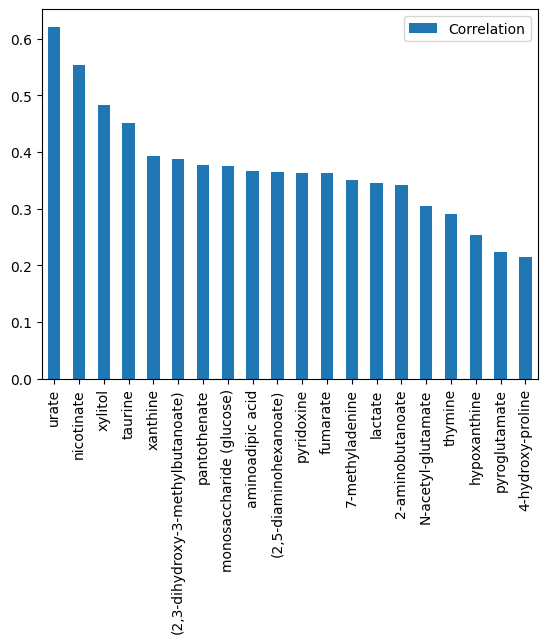

In [40]:
correlations = correlations.sort_values(by='Correlation', ascending=False)
plot = correlations.head(20).plot.bar()


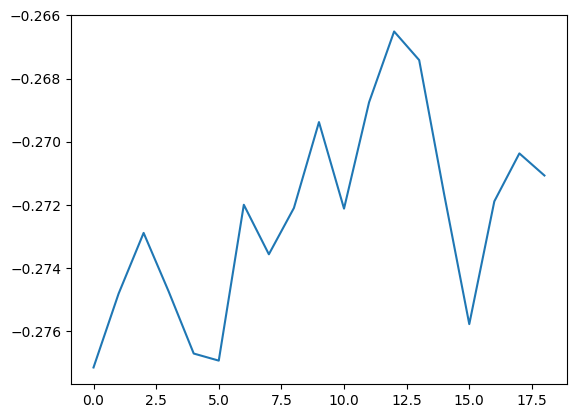

In [41]:
plt.plot(abundances)

In [42]:
plt.show()

In [43]:
row = metabolites_df.loc[metabolites_df['#OTU ID'] == outcome].iloc[0][:-1]
list = [float(value) for value in row]
list

[-0.27724222563055445,
 -0.27720133973979444,
 -0.2771244503151431,
 -0.27682229183970497,
 -0.2770224807343263,
 -0.2770153635169051,
 -0.27701273557394673,
 -0.27709267633813983,
 -0.2766007454458181,
 -0.27603805900528683,
 -0.2765277869690328,
 -0.27682735396800917,
 -0.27643930006570705,
 -0.27528243212600806,
 -0.27528194665916483,
 -0.26650692851821073,
 -0.2763617539104798,
 -0.2751526695491019,
 -0.27249261580268314]

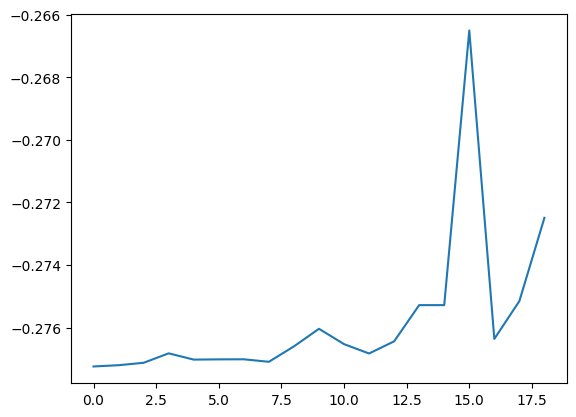

In [44]:
plt.plot(list)
plt.show()

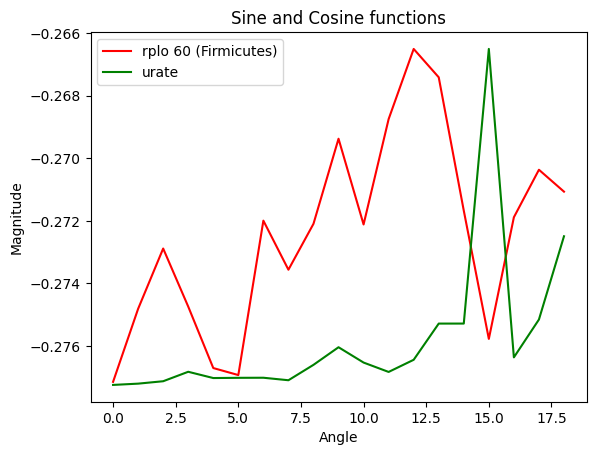

In [45]:
# Plotting both the curves simultaneously
plt.plot(abundances, color='r', label=treatment[1])
plt.plot(list, color='g', label=outcome)

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Angle")
plt.ylabel("Magnitude")
plt.title("Sine and Cosine functions")

# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

# To load the display window
plt.show()

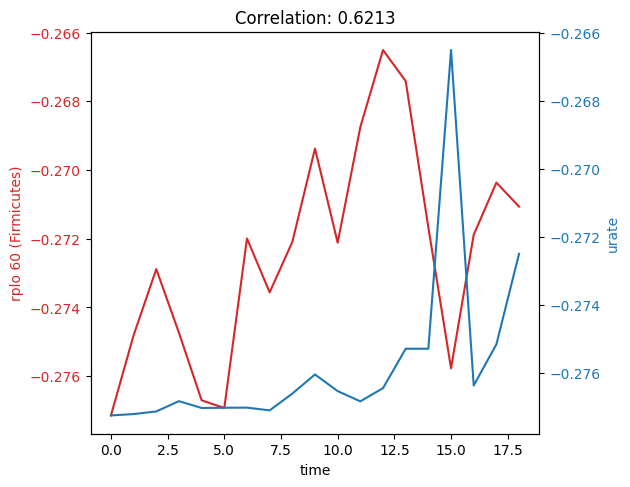

In [46]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel(treatment[1], color=color)
ax1.plot(abundances, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel(outcome, color=color)  # we already handled the x-label with ax1
ax2.plot(list, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title(f"Correlation: {round(float(correlations.loc[outcome].iloc[0]), 4)}")
# plt.show()
plt.savefig(f"{treatment[1]}-{outcome}.png")


In [47]:
round(float(correlations.loc[outcome].iloc[0]), 4)

0.6213